#### This code solves the 1D Darcy equation for fluid flow in a porous media with a constant flow rate boundary condition at both ends of the domain. The code first initializes the simulation parameters and arrays, then assembles the coefficient matrix and right-hand side of the system of equations, and solves for the pressure using the numpy.linalg.solve function. Finally, the code calculates the velocity using upwind scheme and plots the pressure as a function of distance. 


##### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

###### Define simulation parameters

In [2]:
L = 1  # Length of domain
nx = 100  # Number of grid points
dx = L / nx  # Grid spacing
k = 1e-3  # Permeability
mu = 1e-3  # Viscosity
rho = 1  # Density
Q = 1e-6  # Flow rate

##### Initialize arrays

In [3]:
# Initialize arrays
u = np.zeros(nx+2)  # Velocity
p = np.zeros(nx+2)  # Pressure
phi = np.ones(nx+2)  # Porosity
A = np.zeros((nx+2, nx+2))  # Coefficient matrix
b = np.zeros(nx+2)  # Right-hand side

#### Assemble coefficient matrix and right-hand side

In [4]:
for i in range(1, nx+1):
    A[i, i] = phi[i] / k
    if u[i] >= 0:
        A[i, i-1] = -phi[i-1] / k  # Upwind scheme for u >= 0
    else:
        A[i, i+1] = -phi[i+1] / k  # Upwind scheme for u < 0
    b[i] = Q * rho / phi[i]

###### Set boundary conditions for porosity

In [5]:
A[0, 0] = 1  # Set diagonal entry to 1 at the first grid point
A[-1, -1] = 1  # Set diagonal entry to 1 at the last grid point

##### Solve system of equations

In [6]:
p = np.linalg.solve(A, b)

##### Calculate velocity using upwind scheme

In [7]:
for i in range(1, nx+1):
    if p[i] >= p[i+1]:
        u[i] = -k * (p[i] - p[i-1]) / (dx * mu)  # Upwind scheme for p >= p[i+1]
    else:
        u[i] = -k * (p[i+2] - p[i+1]) / (dx * mu)  # Upwind scheme for p < p[i+1]

##### Plot Results

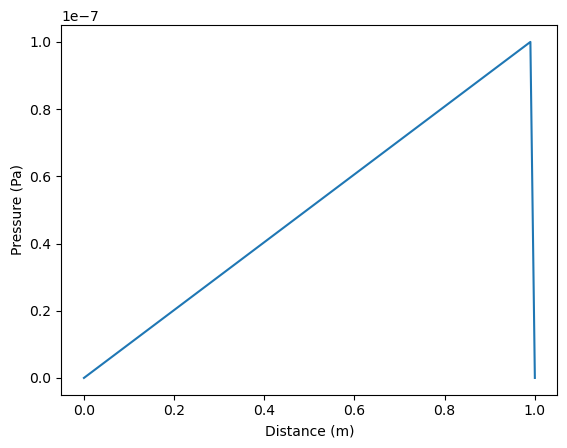

In [8]:
x = np.linspace(0, L, nx+2)
plt.plot(x,p)
plt.xlabel('Distance (m)')
plt.ylabel('Pressure (Pa)')
plt.show()

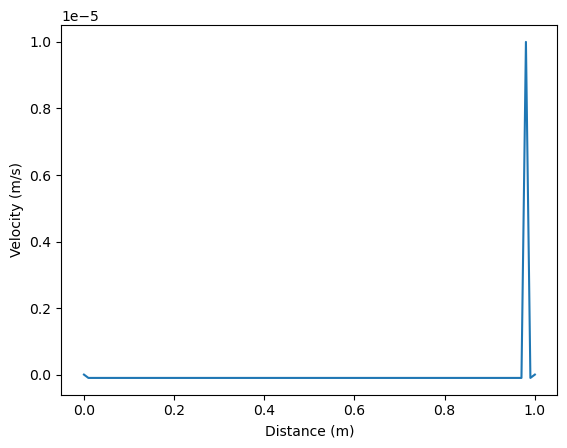

In [14]:
plt.plot(x,u)
plt.xlabel('Distance (m)')
plt.ylabel('Velocity (m/s)')
plt.show()

In [13]:
### The p array contains 102 values which linearly increases with time